In [1]:
import numpy as np

In [2]:
# Generate a dummy dataset
X = np.random.randint(10, 50, 100).reshape(20, 5)

In [8]:
# mean centering the data
X_meaned = X - np.mean(X, axis=0)

In [9]:
# calculating the covariance matrix of the mean-centered data
cov_mat = np.cov(X_meaned, rowvar=False)

In [11]:
print(cov_mat)

[[165.48421053  11.83684211 -13.37368421  -6.21052632  17.57894737]
 [ 11.83684211 145.18684211  -0.18157895 -10.26315789  44.23684211]
 [-13.37368421  -0.18157895  57.60789474  -2.31578947  27.81578947]
 [ -6.21052632 -10.26315789  -2.31578947 115.36842105 -33.89473684]
 [ 17.57894737  44.23684211  27.81578947 -33.89473684 149.84210526]]


In [14]:
# calculating Eigenvalues and Eigenvectors of the covariance matrix
eigen_values, eigen_vectors = np.linalg.eigh(cov_mat)

In [16]:
eigen_values

array([ 45.03473724,  94.38518686, 119.71065441, 159.61745564,
       214.74143953])

In [24]:
# sort the Eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]

sorted_eigenvalues = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [25]:
# select the first n eigenvectors, n is desired dimension
# of our final reduced data

n_components = 2
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
X_reduced = np.dot(eigenvector_subset.T, X_meaned.T).T

In [28]:
print(X_reduced)

[[  3.96991247  13.45809882]
 [  8.56285803 -10.44813691]
 [  1.34318879  -2.44557744]
 [ -1.82772603 -11.62612591]
 [  0.32352342 -16.58324916]
 [ -7.66046856 -23.51354092]
 [ 14.95796445  -8.87194155]
 [ -0.28191564   7.03835538]
 [  9.45872773   3.61545095]
 [ -3.6925174   16.85060393]
 [ 13.35575235  16.24356307]
 [-19.41580132   7.8170866 ]
 [  5.83874853 -12.31349181]
 [-30.46897565  -0.89208363]
 [ 23.74491625   0.63842326]
 [ -7.27076446  -7.10345627]
 [ 11.12278714  24.36479792]
 [ 19.54029825  -8.8026726 ]
 [-27.68593672   0.38277524]
 [-13.91457162  12.19112103]]


In [1]:
from sklearn.datasets import load_iris

In [7]:
data = load_iris()
X = data.data
y = data.target

In [10]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaled_X = StandardScaler().fit_transform(X.T)

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA()

In [18]:
pca.fit(scaled_X)
pca_data = pca.transform(scaled_X)

In [25]:
import numpy as np
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]

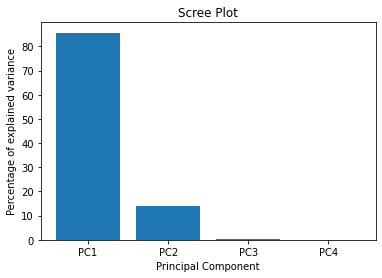

In [27]:
import matplotlib.pyplot as plt

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of explained variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

In [29]:
pca_data.shape

(4, 4)

In [30]:
import pandas as pd

pca_df = pd.DataFrame(pca_data, index=data.feature_names, columns=labels)
pca_df

,PC1,PC2,PC3,PC4
sepal length (cm),16.159427,-1.308981,0.562507,-7.534184e-15
sepal width (cm),-3.118805,-6.195034,-0.628825,3.811558e-15
petal length (cm),2.372139,6.606103,-0.563896,1.952751e-15
petal width (cm),-15.412762,0.897912,0.630214,2.305073e-15


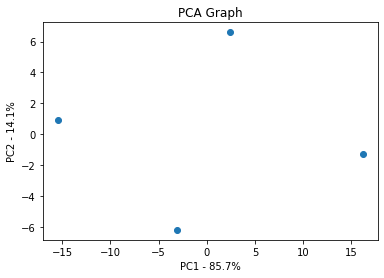

In [36]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA Graph")
plt.xlabel(f"PC1 - {per_var[0]}%")
plt.ylabel(f"PC2 - {per_var[1]}%")
plt.show()

In [42]:
loading_scores = pd.Series(pca.components_[0])
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)

sorted_loading_scores

64    0.088163
57    0.088082
79    0.088065
93    0.087925
65    0.087920
        ...   
32    0.070368
16    0.070116
33    0.069775
15    0.068998
22    0.067151
Length: 150, dtype: float64

In [3]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
cancer = load_breast_cancer()

In [4]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)

In [6]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [9]:
scaled_data = scaler.transform(df)

In [10]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=3)

In [12]:
pca.fit(scaled_data)

PCA(n_components=3)

In [13]:
x_pca = pca.transform(scaled_data)

In [14]:
print(scaled_data.shape)
print(x_pca.shape)

(569, 30)
(569, 3)


In [15]:
colors = ["red" if x == 0 else "blue" for x in cancer["target"]]

In [26]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=colors)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

ValueError: s must be a scalar, or float array-like with the same size as x and y

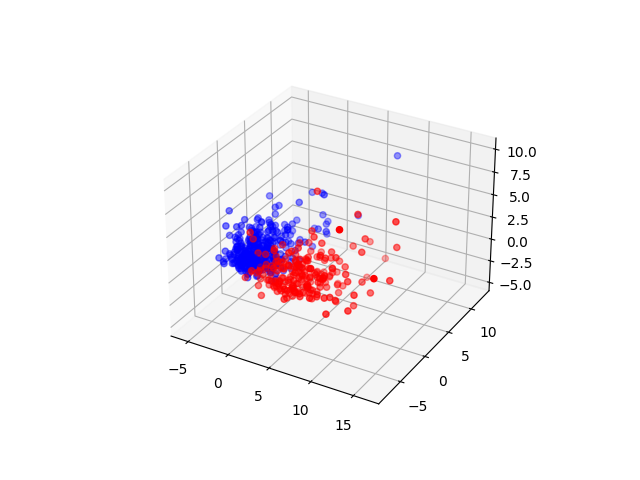

In [28]:
%matplotlib widget
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=colors)
plt.show()